In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [2]:
import os
#Change working directory
os.chdir('/Users/aleksandrabahareva/Downloads')


In [3]:
dataset = pd.read_csv('Bitcoin Energy Consumption.csv')
#Convert into datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

In [4]:
from datetime import datetime
indexedDataset.head(5)

,Estimated TWh per Year,Minimum TWh per Year
Date,,
2017-02-10,9.585659,3.331026
2017-02-11,9.547335,3.316227
2017-02-12,9.578774,3.198969
2017-02-13,9.476506,3.045178
2017-02-14,9.544807,3.150062


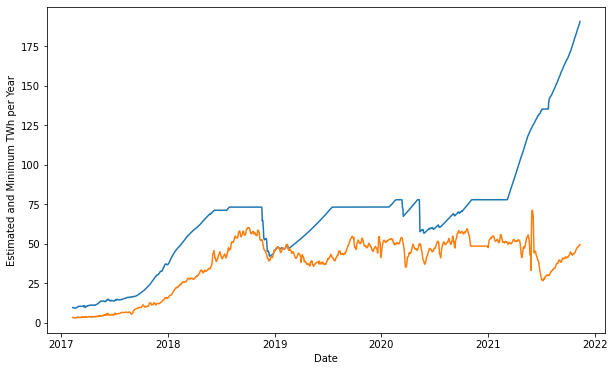

In [5]:
#plot graph
plt.xlabel("Date")
plt.ylabel("Estimated and Minimum TWh per Year")
plt.plot(indexedDataset)

            Estimated TWh per Year  Minimum TWh per Year
Date                                                    
2017-02-10                     NaN                   NaN
2017-02-11                     NaN                   NaN
2017-02-12                     NaN                   NaN
2017-02-13                     NaN                   NaN
2017-02-14                     NaN                   NaN
...                            ...                   ...
2021-11-06              115.759903             45.388715
2021-11-07              116.062761             45.389692
2021-11-08              116.367265             45.391024
2021-11-09              116.674373             45.393454
2021-11-10              116.983163             45.395921

[1736 rows x 2 columns]             Estimated TWh per Year  Minimum TWh per Year
Date                                                    
2017-02-10                     NaN                   NaN
2017-02-11                     NaN                   NaN
2017-0

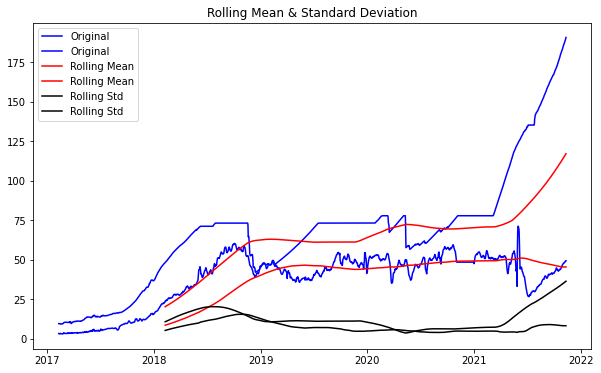

In [6]:
#Determining rolling statistics
#Rolling mean
rolmean = indexedDataset.rolling(window=365).mean()

#Rolling standard deviation
rolstd = indexedDataset.rolling(window=365).std()
print(rolmean, rolstd)

#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [7]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Estimated TWh per Year'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    2.028856
p-value                           0.998709
#Lags Used                       13.000000
Number of Observations Used    1722.000000
Critical Value (1%)              -3.434153
dtype: float64
Test Statistic                    2.028856
p-value                           0.998709
#Lags Used                       13.000000
Number of Observations Used    1722.000000
Critical Value (1%)              -3.434153
Critical Value (5%)              -2.863220
dtype: float64
Test Statistic                    2.028856
p-value                           0.998709
#Lags Used                       13.000000
Number of Observations Used    1722.000000
Critical Value (1%)              -3.434153
Critical Value (5%)              -2.863220
Critical Value (10%)             -2.567664
dtype: float64
